# Practical Questions

1. Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and
interpret the results.

In [1]:
from scipy.stats import norm

# Inputs: sample mean, population mean, standard deviation, sample size
sample_mean = 105
population_mean = 100
population_std_dev = 15
sample_size = 30

# Calculate the Z-score
z_score = (sample_mean - population_mean) / (population_std_dev / (sample_size ** 0.5))

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - norm.cdf(abs(z_score)))

# Interpretation
print(f"Z-Score: {z_score}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis. The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.")

Z-Score: 1.8257418583505538
P-Value: 0.067889154861829
Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.


2.  Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python.

In [2]:
import numpy as np
from scipy.stats import ttest_1samp

# Simulate random data
np.random.seed(42)  # For reproducibility
data = np.random.normal(loc=100, scale=10, size=30)  # Mean=100, StdDev=10, Sample size=30

# Perform one-sample t-test
test_statistic, p_value = ttest_1samp(data, popmean=105)  # Comparing to population mean of 105

# Results
print(f"Test Statistic: {test_statistic}")
print(f"P-Value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("Reject the null hypothesis: The sample mean significantly differs from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the sample mean and the population mean.")

Test Statistic: -4.187898733374779
P-Value: 0.00023965836838861065
Reject the null hypothesis: The sample mean significantly differs from the population mean.


3.  Implement a one-sample Z-test using Python to compare the sample mean with the population mean.

In [3]:
from scipy.stats import norm

# Input values
sample_mean = 85
population_mean = 80
population_std_dev = 12
sample_size = 40

# Calculate the Z-score
z_score = (sample_mean - population_mean) / (population_std_dev / (sample_size ** 0.5))

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - norm.cdf(abs(z_score)))

# Output the results
print(f"Z-Score: {z_score}")
print(f"P-Value: {p_value}")

# Interpretation of results
if p_value < 0.05:
    print("Reject the null hypothesis: The sample mean significantly differs from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the sample mean and the population mean.")

Z-Score: 2.6352313834736494
P-Value: 0.008407994577249278
Reject the null hypothesis: The sample mean significantly differs from the population mean.


4.  Perform a two-tailed Z-test using Python and visualize the decision region on a plot.

Z-Score: 3.5355339059327378
P-Value: 0.00040695201744500586
Critical Z-Values: -1.959963984540054, 1.959963984540054
Reject the null hypothesis: The sample mean significantly differs from the population mean.


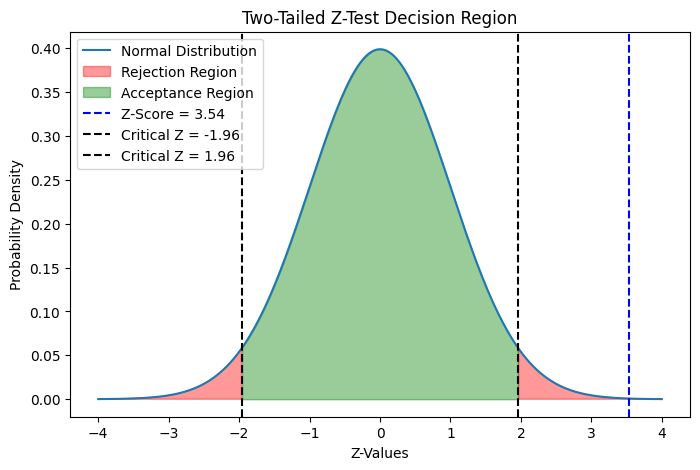

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Inputs
sample_mean = 85  # Mean of the sample
population_mean = 80  # Population mean
population_std_dev = 10  # Known standard deviation of the population
sample_size = 50  # Sample size
alpha = 0.05  # Significance level

# Calculate Z-score
z_score = (sample_mean - population_mean) / (population_std_dev / (sample_size ** 0.5))

# Critical Z-values for two-tailed test
z_critical = norm.ppf(1 - alpha / 2)  # Two-tailed critical value
z_region_low = -z_critical
z_region_high = z_critical

# P-value for two-tailed test
p_value = 2 * (1 - norm.cdf(abs(z_score)))

# Results
print(f"Z-Score: {z_score}")
print(f"P-Value: {p_value}")
print(f"Critical Z-Values: {z_region_low}, {z_region_high}")

if abs(z_score) > z_critical:
    print("Reject the null hypothesis: The sample mean significantly differs from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the sample mean and the population mean.")

# Visualize Decision Region
z_values = np.linspace(-4, 4, 1000)
pdf_values = norm.pdf(z_values)

plt.figure(figsize=(8, 5))
plt.plot(z_values, pdf_values, label="Normal Distribution")

# Highlight rejection regions
plt.fill_between(z_values, pdf_values, where=(z_values < z_region_low) | (z_values > z_region_high),
                 color='red', alpha=0.4, label='Rejection Region')

# Highlight acceptance region
plt.fill_between(z_values, pdf_values, where=(z_values >= z_region_low) & (z_values <= z_region_high),
                 color='green', alpha=0.4, label='Acceptance Region')

# Mark Z-score
plt.axvline(z_score, color='blue', linestyle='--', label=f"Z-Score = {z_score:.2f}")
plt.axvline(z_region_low, color='black', linestyle='--', label=f"Critical Z = {z_region_low:.2f}")
plt.axvline(z_region_high, color='black', linestyle='--', label=f"Critical Z = {z_region_high:.2f}")

plt.title("Two-Tailed Z-Test Decision Region")
plt.xlabel("Z-Values")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

5.  Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing.

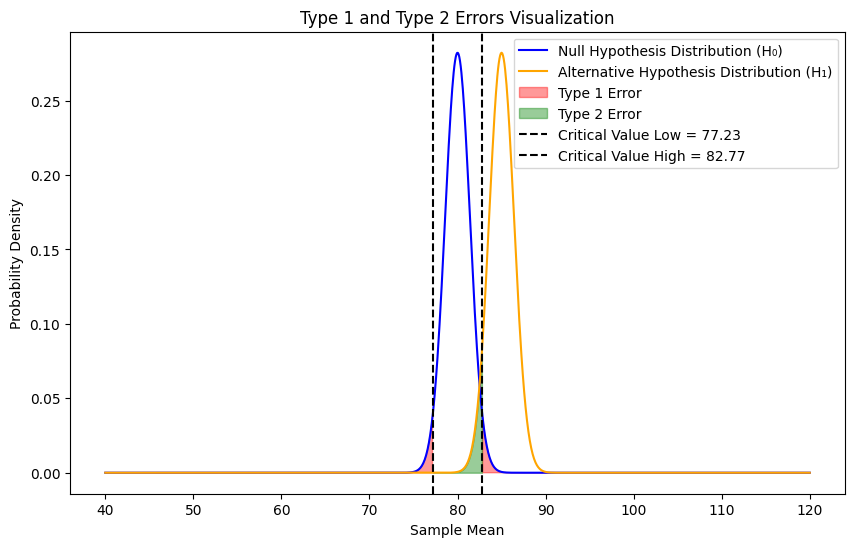

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def visualize_errors(population_mean, population_std_dev, sample_size,
                     alpha, true_mean):
    """
    Calculates and visualizes Type 1 and Type 2 errors in hypothesis testing.

    Arguments:
    population_mean -- Assumed population mean under the null hypothesis.
    population_std_dev -- Population standard deviation.
    sample_size -- Sample size.
    alpha -- Significance level (Type 1 error probability).
    true_mean -- Actual mean value (used to calculate Type 2 error).
    """
    # Calculate critical Z-value
    z_critical = norm.ppf(1 - alpha / 2)  # Two-tailed test
    critical_value_low = population_mean - z_critical * (population_std_dev / np.sqrt(sample_size))
    critical_value_high = population_mean + z_critical * (population_std_dev / np.sqrt(sample_size))

    # Define the range for the graph
    x_values = np.linspace(population_mean - 4 * population_std_dev,
                           population_mean + 4 * population_std_dev, 1000)

    # Null hypothesis distribution (population mean)
    null_distribution = norm.pdf(x_values, population_mean, population_std_dev / np.sqrt(sample_size))

    # Alternative hypothesis distribution (true mean)
    alt_distribution = norm.pdf(x_values, true_mean, population_std_dev / np.sqrt(sample_size))

    # Visualization
    plt.figure(figsize=(10, 6))

    # Plot null hypothesis distribution
    plt.plot(x_values, null_distribution, label="Null Hypothesis Distribution (H₀)", color="blue")

    # Plot alternative hypothesis distribution
    plt.plot(x_values, alt_distribution, label="Alternative Hypothesis Distribution (H₁)", color="orange")

    # Highlight Type 1 error region
    plt.fill_between(x_values, null_distribution, where=(x_values < critical_value_low) |
                     (x_values > critical_value_high), color='red', alpha=0.4, label="Type 1 Error")

    # Highlight Type 2 error region
    plt.fill_between(x_values, alt_distribution, where=(x_values >= critical_value_low) &
                     (x_values <= critical_value_high), color='green', alpha=0.4, label="Type 2 Error")

    # Critical values
    plt.axvline(critical_value_low, color='black', linestyle='--', label=f"Critical Value Low = {critical_value_low:.2f}")
    plt.axvline(critical_value_high, color='black', linestyle='--', label=f"Critical Value High = {critical_value_high:.2f}")

    # Labels and legend
    plt.title("Type 1 and Type 2 Errors Visualization")
    plt.xlabel("Sample Mean")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.show()

# Example usage
visualize_errors(population_mean=80, population_std_dev=10, sample_size=50,
                 alpha=0.05, true_mean=85)

6.  Write a Python program to perform an independent T-test and interpret the results.

In [6]:
from scipy.stats import ttest_ind

# Sample data for two groups
group_1 = [23, 45, 67, 89, 12, 34, 56]
group_2 = [34, 65, 76, 45, 23, 25, 78]

# Perform an independent t-test
test_statistic, p_value = ttest_ind(group_1, group_2)

# Results
print(f"T-Statistic: {test_statistic}")
print(f"P-Value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The means of the two groups are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the means of the two groups.")

T-Statistic: -0.21330577916643106
P-Value: 0.8346694205435257
Fail to reject the null hypothesis: No significant difference between the means of the two groups.


7.  Perform a paired sample T-test using Python and visualize the comparison results.

T-Statistic: 11.499999999999998
P-Value: 2.5972050768764743e-05
Reject the null hypothesis: There is a significant difference between the paired samples.


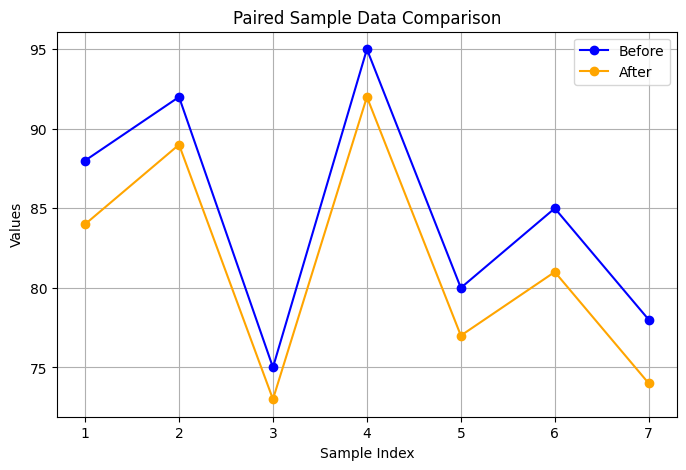

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Example data: before-and-after measurements
before = [88, 92, 75, 95, 80, 85, 78]
after = [84, 89, 73, 92, 77, 81, 74]

# Perform paired sample T-test
test_statistic, p_value = ttest_rel(before, after)

# Results
print(f"T-Statistic: {test_statistic}")
print(f"P-Value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the paired samples.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the paired samples.")

# Visualization
x_labels = range(1, len(before) + 1)
plt.figure(figsize=(8, 5))
plt.plot(x_labels, before, label="Before", marker='o', color="blue")
plt.plot(x_labels, after, label="After", marker='o', color="orange")
plt.title("Paired Sample Data Comparison")
plt.xlabel("Sample Index")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()

8.  Simulate data and perform both Z-test and T-test, then compare the results using Python.

In [8]:
import numpy as np
from scipy.stats import ttest_1samp, norm

# Simulate random data
np.random.seed(42)  # For reproducibility
sample_size = 30
population_mean = 100
population_std_dev = 15

# Generate a random sample from a normal distribution
data = np.random.normal(loc=population_mean, scale=population_std_dev, size=sample_size)

# Calculate sample mean and standard deviation
sample_mean = np.mean(data)
sample_std_dev = np.std(data, ddof=1)

# Perform a Z-test (assuming population standard deviation is known)
z_score = (sample_mean - population_mean) / (population_std_dev / np.sqrt(sample_size))
p_value_z = 2 * (1 - norm.cdf(abs(z_score)))

# Perform a T-test (when population standard deviation is unknown)
t_statistic, p_value_t = ttest_1samp(data, popmean=population_mean)

# Results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std_dev:.2f}")
print("\nZ-Test Results:")
print(f"Z-Score: {z_score:.2f}")
print(f"P-Value (Z-Test): {p_value_z:.4f}")
print("\nT-Test Results:")
print(f"T-Statistic: {t_statistic:.2f}")
print(f"P-Value (T-Test): {p_value_t:.4f}")

# Interpretation
alpha = 0.05  # Significance level
print("\nInterpretation:")
if p_value_z < alpha:
    print("Z-Test: Reject the null hypothesis (significant difference).")
else:
    print("Z-Test: Fail to reject the null hypothesis (no significant difference).")

if p_value_t < alpha:
    print("T-Test: Reject the null hypothesis (significant difference).")
else:
    print("T-Test: Fail to reject the null hypothesis (no significant difference).")

Sample Mean: 97.18
Sample Standard Deviation: 13.50

Z-Test Results:
Z-Score: -1.03
P-Value (Z-Test): 0.3028

T-Test Results:
T-Statistic: -1.15
P-Value (T-Test): 0.2616

Interpretation:
Z-Test: Fail to reject the null hypothesis (no significant difference).
T-Test: Fail to reject the null hypothesis (no significant difference).


9.  Write a Python function to calculate the confidence interval for a sample mean and explain its significance.

In [9]:
import numpy as np
from scipy.stats import norm

def calculate_confidence_interval(data, confidence_level=0.95):
    """
    Calculate the confidence interval for a sample mean.

    Parameters:
    data (list or numpy array): Sample data
    confidence_level (float): Desired confidence level (default is 0.95)

    Returns:
    (float, float): Lower and upper bounds of the confidence interval
    """
    # Calculate sample mean and standard deviation
    sample_mean = np.mean(data)
    sample_std_dev = np.std(data, ddof=1)  # ddof=1 for sample standard deviation
    sample_size = len(data)

    # Calculate the Z-value for the given confidence level
    z_value = norm.ppf(1 - (1 - confidence_level) / 2)

    # Calculate margin of error
    margin_of_error = z_value * (sample_std_dev / np.sqrt(sample_size))

    # Calculate confidence interval
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    return lower_bound, upper_bound

# Example usage
data = [88, 92, 75, 95, 80, 85, 78]
confidence_level = 0.95
lower, upper = calculate_confidence_interval(data, confidence_level)

print(f"Confidence Interval ({confidence_level * 100}%): ({lower:.2f}, {upper:.2f})")

Confidence Interval (95.0%): (79.21, 90.22)


10. Write a Python program to calculate the margin of error for a given confidence level using sample data.

In [10]:
import numpy as np
from scipy.stats import norm

def calculate_margin_of_error(data, confidence_level=0.95):
    """
    Calculate the margin of error for a given confidence level using sample data.

    Parameters:
    data (list or numpy array): Sample data
    confidence_level (float): Desired confidence level (default is 0.95)

    Returns:
    float: Margin of error
    """
    # Calculate sample mean and standard deviation
    sample_mean = np.mean(data)
    sample_std_dev = np.std(data, ddof=1)  # ddof=1 for sample standard deviation
    sample_size = len(data)

    # Calculate the Z-value for the given confidence level
    z_value = norm.ppf(1 - (1 - confidence_level) / 2)

    # Calculate margin of error
    margin_of_error = z_value * (sample_std_dev / np.sqrt(sample_size))

    return margin_of_error

# Example usage
data = [88, 92, 75, 95, 80, 85, 78]
confidence_level = 0.95
margin_of_error = calculate_margin_of_error(data, confidence_level)

print(f"Margin of Error ({confidence_level * 100}% confidence): {margin_of_error:.2f}")

Margin of Error (95.0% confidence): 5.51


11.  Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process.

In [11]:
# Function to compute Bayes' Theorem
def bayesian_inference(prior_prob, likelihood, marginal_prob):
    """
    Calculate the posterior probability using Bayes' Theorem.

    Parameters:
    prior_prob (float): Prior probability of the hypothesis (P(H)).
    likelihood (float): Likelihood of the evidence given the hypothesis (P(E|H)).
    marginal_prob (float): Marginal probability of the evidence (P(E)).

    Returns:
    float: Posterior probability (P(H|E)).
    """
    posterior_prob = (prior_prob * likelihood) / marginal_prob
    return posterior_prob

# Example values
prior_prob = 0.2  # P(H): Hypothesis is true
likelihood = 0.8  # P(E|H): Evidence given hypothesis
marginal_prob = 0.5  # P(E): Evidence overall

posterior = bayesian_inference(prior_prob, likelihood, marginal_prob)
print(f"Posterior Probability (P(H|E)): {posterior:.2f}")

Posterior Probability (P(H|E)): 0.32


12.  Perform a Chi-square test for independence between two categorical variables in Python.

In [12]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example data: Contingency table
data = {'Category_A': [30, 40, 50],  # Observed frequencies for Category A
        'Category_B': [20, 60, 40]}  # Observed frequencies for Category B
df = pd.DataFrame(data, index=['Group_1', 'Group_2', 'Group_3'])

# Perform the Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(df)

# Results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:")
print(expected)

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between the two variables.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between the two variables.")

Chi-Square Statistic: 7.111111111111111
P-Value: 0.02856550078455038
Degrees of Freedom: 2

Expected Frequencies:
[[25. 25.]
 [50. 50.]
 [45. 45.]]
Reject the null hypothesis: There is a significant relationship between the two variables.


13. Write a Python program to calculate the expected frequencies for a Chi-square test based on observed
data.

In [13]:
import pandas as pd

def calculate_expected_frequencies(observed):
    """
    Calculate the expected frequencies for a Chi-square test based on observed data.

    Parameters:
    observed (pd.DataFrame): A contingency table with observed frequencies.

    Returns:
    pd.DataFrame: A contingency table with expected frequencies.
    """
    # Convert to DataFrame if input is not already a DataFrame
    if not isinstance(observed, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame")

    # Calculate row totals and column totals
    row_totals = observed.sum(axis=1)
    col_totals = observed.sum(axis=0)
    grand_total = observed.values.sum()

    # Calculate expected frequencies
    expected = pd.DataFrame(index=observed.index, columns=observed.columns)
    for row in observed.index:
        for col in observed.columns:
            expected.loc[row, col] = (row_totals[row] * col_totals[col]) / grand_total

    return expected

# Example observed data (contingency table)
observed = pd.DataFrame({
    'Category_A': [30, 40, 50],
    'Category_B': [20, 60, 40]
}, index=['Group_1', 'Group_2', 'Group_3'])

# Calculate expected frequencies
expected_frequencies = calculate_expected_frequencies(observed)

print("Observed Frequencies:")
print(observed)
print("\nExpected Frequencies:")
print(expected_frequencies)

Observed Frequencies:
         Category_A  Category_B
Group_1          30          20
Group_2          40          60
Group_3          50          40

Expected Frequencies:
        Category_A Category_B
Group_1       25.0       25.0
Group_2       50.0       50.0
Group_3       45.0       45.0


14.  Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution.

In [14]:
from scipy.stats import chisquare

# Observed data
observed = [50, 30, 20]  # Example observed frequencies

# Expected data
expected = [40, 40, 20]  # Example expected frequencies

# Perform the Chi-square goodness-of-fit test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The observed data significantly differs from the expected distribution.")
else:
    print("Fail to reject the null hypothesis: The observed data does not significantly differ from the expected distribution.")

Chi-Square Statistic: 5.0
P-Value: 0.0820849986238988
Fail to reject the null hypothesis: The observed data does not significantly differ from the expected distribution.


15.  Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics.

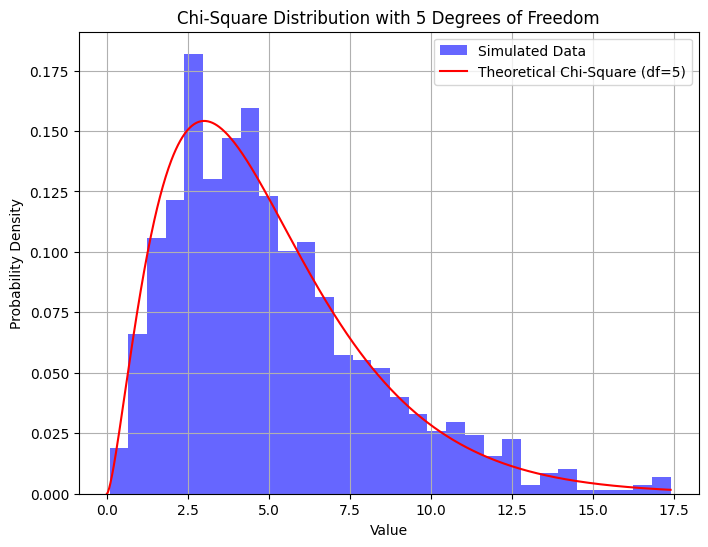

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

def simulate_chi_square(df, size=1000):
    """
    Simulate and visualize the Chi-square distribution.

    Parameters:
    df (int): Degrees of freedom for the Chi-square distribution.
    size (int): Number of random samples to generate (default: 1000).
    """
    # Simulate random samples from a Chi-square distribution
    simulated_data = np.random.chisquare(df, size)

    # Visualize the distribution
    plt.figure(figsize=(8, 6))
    plt.hist(simulated_data, bins=30, density=True, alpha=0.6, color='blue', label='Simulated Data')

    # Overlay the theoretical Chi-square distribution
    x_values = np.linspace(0, np.max(simulated_data), 1000)
    pdf_values = chi2.pdf(x_values, df)
    plt.plot(x_values, pdf_values, color='red', label=f'Theoretical Chi-Square (df={df})')

    # Add labels and legend
    plt.title(f"Chi-Square Distribution with {df} Degrees of Freedom")
    plt.xlabel("Value")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
simulate_chi_square(df=5, size=1000)

16.  Implement an F-test using Python to compare the variances of two random samples.

In [16]:
import numpy as np
from scipy.stats import f

def perform_f_test(sample1, sample2):
    """
    Perform an F-test to compare the variances of two samples.

    Parameters:
    sample1 (list or numpy array): First sample data
    sample2 (list or numpy array): Second sample data

    Returns:
    float: F-statistic
    float: P-value
    """
    # Calculate variances of the two samples
    var1 = np.var(sample1, ddof=1)  # Sample variance (unbiased)
    var2 = np.var(sample2, ddof=1)

    # Calculate F-statistic (larger variance divided by smaller variance)
    if var1 > var2:
        f_statistic = var1 / var2
        dfn = len(sample1) - 1  # Degrees of freedom for sample 1
        dfd = len(sample2) - 1  # Degrees of freedom for sample 2
    else:
        f_statistic = var2 / var1
        dfn = len(sample2) - 1
        dfd = len(sample1) - 1

    # Calculate P-value using the F-distribution
    p_value = 1 - f.cdf(f_statistic, dfn, dfd)

    return f_statistic, p_value

# Example usage
np.random.seed(42)  # For reproducibility
sample1 = np.random.normal(loc=20, scale=5, size=30)  # Mean=20, StdDev=5, Size=30
sample2 = np.random.normal(loc=22, scale=7, size=30)  # Mean=22, StdDev=7, Size=30

f_statistic, p_value = perform_f_test(sample1, sample2)

print(f"F-Statistic: {f_statistic:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The variances of the two samples are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in variances between the two samples.")

F-Statistic: 2.10
P-Value: 0.0252
Reject the null hypothesis: The variances of the two samples are significantly different.


17. Write a Python program to perform an ANOVA test to compare means between multiple groups and
interpret the results.

In [17]:
import numpy as np
from scipy.stats import f_oneway

# Example data: Three groups with sample values
group_1 = [88, 92, 75, 95, 80]
group_2 = [78, 85, 82, 88, 83]
group_3 = [90, 85, 85, 92, 88]

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(group_1, group_2, group_3)

# Results
print(f"F-Statistic: {f_statistic:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between group means.")
else:
    print("Fail to reject the null hypothesis: No significant difference between group means.")

F-Statistic: 0.94
P-Value: 0.4173
Fail to reject the null hypothesis: No significant difference between group means.


18.  Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results.

F-Statistic: 0.94
P-Value: 0.4173
Fail to reject the null hypothesis: No significant difference between group means.


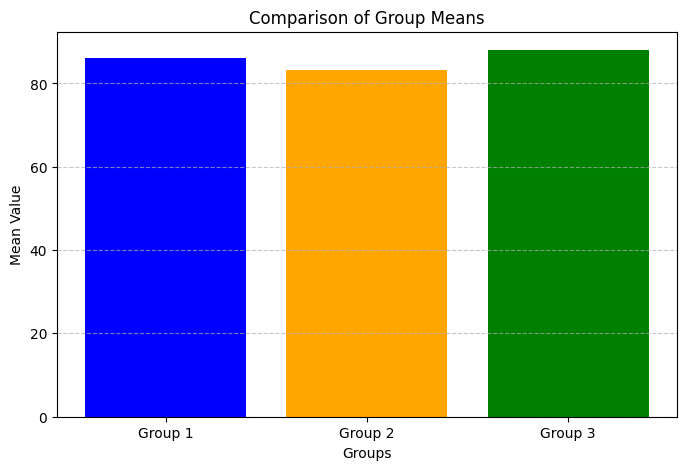

In [18]:
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

# Example data: Groups with sample values
group_1 = [88, 92, 75, 95, 80]
group_2 = [78, 85, 82, 88, 83]
group_3 = [90, 85, 85, 92, 88]

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(group_1, group_2, group_3)

# Print test results
print(f"F-Statistic: {f_statistic:.2f}")
print(f"P-Value: {p_value:.4f}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between group means.")
else:
    print("Fail to reject the null hypothesis: No significant difference between group means.")

# Visualization
groups = ['Group 1', 'Group 2', 'Group 3']
group_means = [np.mean(group_1), np.mean(group_2), np.mean(group_3)]

plt.figure(figsize=(8, 5))
plt.bar(groups, group_means, color=['blue', 'orange', 'green'])
plt.title("Comparison of Group Means")
plt.ylabel("Mean Value")
plt.xlabel("Groups")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

19.  Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVA.

### Normality (Shapiro-Wilk Test) ###
Group: A - p-value: 0.7075
  -> Fail to reject null hypothesis: Data is normally distributed.
Group: B - p-value: 0.2044
  -> Fail to reject null hypothesis: Data is normally distributed.
Group: C - p-value: 0.4177
  -> Fail to reject null hypothesis: Data is normally distributed.

### Independence Assumption ###
Independence cannot be tested statistically but can be checked via study design or time series analysis.

### Homogeneity of Variances (Levene's Test) ###
Levene's Test p-value: 0.5637
  -> Fail to reject null hypothesis: Variances are equal.


<ipython-input-19-f50d80da9ce1>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=groups_column, y=values_column, data=data, palette="Set2")


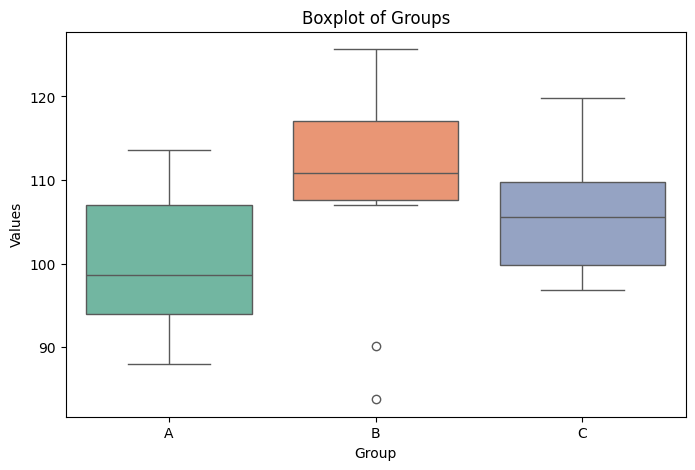

In [19]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro, levene
import seaborn as sns
import matplotlib.pyplot as plt

def check_anova_assumptions(data, groups_column, values_column):
    """
    Check the assumptions of ANOVA: Normality, Independence, and Equal Variance.

    Parameters:
    data (pd.DataFrame): Input DataFrame containing the data
    groups_column (str): Column name containing the group labels
    values_column (str): Column name containing the sample values

    Returns:
    None (Prints results for each assumption check)
    """
    # Normality: Perform Shapiro-Wilk test for each group
    print("### Normality (Shapiro-Wilk Test) ###")
    groups = data[groups_column].unique()
    for group in groups:
        group_data = data[data[groups_column] == group][values_column]
        stat, p_value = shapiro(group_data)
        print(f"Group: {group} - p-value: {p_value:.4f}")
        if p_value < 0.05:
            print("  -> Reject null hypothesis: Data is not normally distributed.")
        else:
            print("  -> Fail to reject null hypothesis: Data is normally distributed.")

    # Independence: Check visually (scatterplot or time ordering, if applicable)
    print("\n### Independence Assumption ###")
    print("Independence cannot be tested statistically but can be checked via study design or time series analysis.")
    # Optional: Visualize data if time ordering exists
    # sns.scatterplot(data=data, x="time_order_column", y=values_column)

    # Homogeneity of Variances: Perform Levene's test
    print("\n### Homogeneity of Variances (Levene's Test) ###")
    group_data = [data[data[groups_column] == group][values_column] for group in groups]
    stat, p_value = levene(*group_data)
    print(f"Levene's Test p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  -> Reject null hypothesis: Variances are not equal.")
    else:
        print("  -> Fail to reject null hypothesis: Variances are equal.")

    # Optional visualization: Boxplot for group comparison
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=groups_column, y=values_column, data=data, palette="Set2")
    plt.title("Boxplot of Groups")
    plt.show()

# Example usage
data = pd.DataFrame({
    'Group': ['A']*10 + ['B']*10 + ['C']*10,
    'Values': np.random.normal(100, 10, 10).tolist() +
              np.random.normal(110, 10, 10).tolist() +
              np.random.normal(105, 10, 10).tolist()
})

check_anova_assumptions(data, groups_column='Group', values_column='Values')

20. Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the
results.

                               sum_sq    df             F        PR(>F)
C(Factor_A)              1.920000e+02   2.0  9.600000e+01  4.142919e-08
C(Factor_B)              4.500000e+00   1.0  4.500000e+00  5.540462e-02
C(Factor_A):C(Factor_B)  5.048710e-29   2.0  2.524355e-29  1.000000e+00
Residual                 1.200000e+01  12.0           NaN           NaN


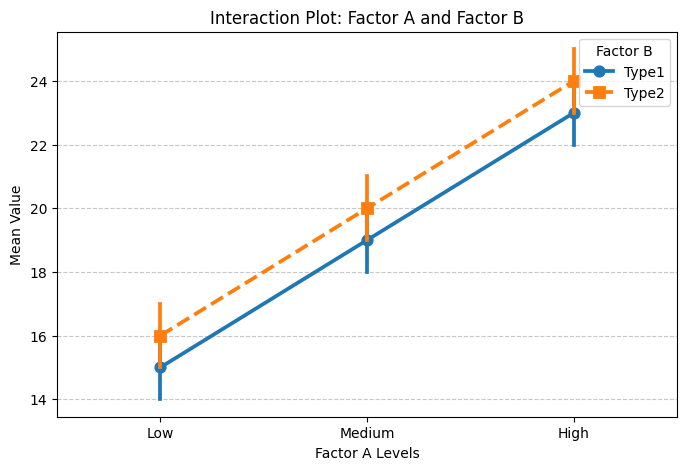

In [20]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
data = pd.DataFrame({
    'Factor_A': ['Low', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'High', 'High'] * 2,
    'Factor_B': ['Type1'] * 9 + ['Type2'] * 9,
    'Value': [14, 15, 16, 18, 19, 20, 22, 23, 24, 15, 16, 17, 19, 20, 21, 23, 24, 25]
})

# Perform two-way ANOVA
formula = 'Value ~ C(Factor_A) + C(Factor_B) + C(Factor_A):C(Factor_B)'
model = ols(formula, data=data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

# Display results
print(anova_results)

# Visualization: Interaction between Factor_A and Factor_B
plt.figure(figsize=(8, 5))
sns.pointplot(data=data, x='Factor_A', y='Value', hue='Factor_B', markers=["o", "s"], linestyles=["-", "--"])
plt.title("Interaction Plot: Factor A and Factor B")
plt.xlabel("Factor A Levels")
plt.ylabel("Mean Value")
plt.legend(title="Factor B")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

21.  Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing.

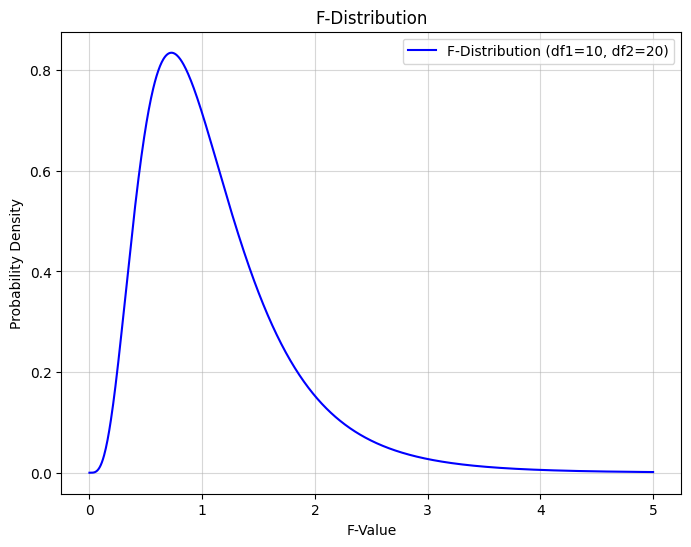

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

def visualize_f_distribution(df1, df2):
    """
    Visualize the F-distribution for given degrees of freedom.

    Parameters:
    df1 (int): Degrees of freedom for the numerator
    df2 (int): Degrees of freedom for the denominator
    """
    # Generate F-distribution values
    x_values = np.linspace(0, 5, 1000)  # Range of F-values
    pdf_values = f.pdf(x_values, df1, df2)  # Probability density function

    # Plot the F-distribution
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, pdf_values, label=f"F-Distribution (df1={df1}, df2={df2})", color="blue")
    plt.title("F-Distribution")
    plt.xlabel("F-Value")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()

# Example usage
visualize_f_distribution(df1=10, df2=20)

22.  Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means.

F-Statistic: 3.69
P-Value: 0.0385
Reject the null hypothesis: There is a significant difference between group means.


<ipython-input-22-d378b2797ec4>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Values', data=data, palette="Set2")


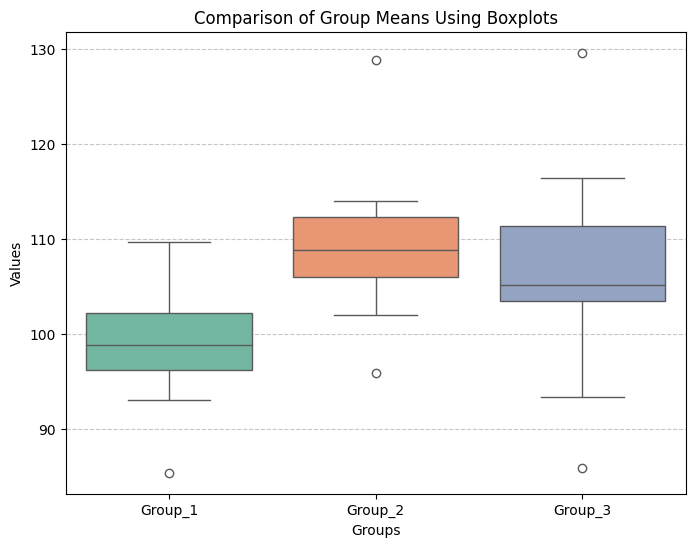

In [22]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# Example data: Groups with sample values
data = pd.DataFrame({
    'Group': ['Group_1'] * 10 + ['Group_2'] * 10 + ['Group_3'] * 10,
    'Values': np.random.normal(100, 10, 10).tolist() +
              np.random.normal(110, 10, 10).tolist() +
              np.random.normal(105, 10, 10).tolist()
})

# Separate values by groups for ANOVA
group_1 = data[data['Group'] == 'Group_1']['Values']
group_2 = data[data['Group'] == 'Group_2']['Values']
group_3 = data[data['Group'] == 'Group_3']['Values']

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(group_1, group_2, group_3)

# Print test results
print(f"F-Statistic: {f_statistic:.2f}")
print(f"P-Value: {p_value:.4f}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between group means.")
else:
    print("Fail to reject the null hypothesis: No significant difference between group means.")

# Visualization: Boxplots to compare group means
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Values', data=data, palette="Set2")
plt.title("Comparison of Group Means Using Boxplots")
plt.xlabel("Groups")
plt.ylabel("Values")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

23.  Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means.

In [23]:
import numpy as np
from scipy.stats import ttest_1samp

# Step 1: Simulate random data from a normal distribution
np.random.seed(42)  # For reproducibility
sample_data = np.random.normal(loc=100, scale=15, size=30)  # Mean=100, StdDev=15, Size=30

# Step 2: Define the population mean for hypothesis testing
population_mean = 105

# Step 3: Perform a one-sample t-test
t_statistic, p_value = ttest_1samp(sample_data, popmean=population_mean)

# Step 4: Output the results
print("Sample Mean:", np.mean(sample_data))
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Step 5: Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean significantly differs from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the sample mean and the population mean.")

Sample Mean: 97.17779656223442
T-Statistic: -3.1736049445959678
P-Value: 0.0035495602599989436
Reject the null hypothesis: The sample mean significantly differs from the population mean.


24.  Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results.

In [24]:
import numpy as np
from scipy.stats import chi2

def test_population_variance(data, hypothesized_variance, alpha=0.05):
    """
    Perform a hypothesis test for population variance using a Chi-square distribution.

    Parameters:
    data (list or numpy array): Sample data
    hypothesized_variance (float): Hypothesized population variance
    alpha (float): Significance level (default is 0.05)

    Returns:
    None (Prints the test statistic, p-value, and interpretation)
    """
    # Calculate sample size and sample variance
    sample_size = len(data)
    sample_variance = np.var(data, ddof=1)  # ddof=1 for unbiased variance

    # Calculate the test statistic (Chi-square)
    chi_square_stat = (sample_size - 1) * sample_variance / hypothesized_variance

    # Degrees of freedom
    degrees_of_freedom = sample_size - 1

    # Calculate p-value for two-tailed test
    p_value = 2 * min(1 - chi2.cdf(chi_square_stat, degrees_of_freedom),
                      chi2.cdf(chi_square_stat, degrees_of_freedom))

    # Critical values for Chi-square
    critical_value_low = chi2.ppf(alpha / 2, degrees_of_freedom)
    critical_value_high = chi2.ppf(1 - alpha / 2, degrees_of_freedom)

    # Results
    print(f"Sample Variance: {sample_variance:.2f}")
    print(f"Chi-Square Statistic: {chi_square_stat:.2f}")
    print(f"Degrees of Freedom: {degrees_of_freedom}")
    print(f"Critical Values: {critical_value_low:.2f}, {critical_value_high:.2f}")
    print(f"P-Value: {p_value:.4f}")

    # Interpretation
    if chi_square_stat < critical_value_low or chi_square_stat > critical_value_high:
        print("Reject the null hypothesis: The population variance significantly differs from the hypothesized value.")
    else:
        print("Fail to reject the null hypothesis: No significant difference in population variance.")

# Example usage
np.random.seed(42)  # For reproducibility
sample_data = np.random.normal(loc=100, scale=15, size=30)  # Mean=100, StdDev=15, Size=30
hypothesized_variance = 225  # Hypothesized variance (15^2)
test_population_variance(sample_data, hypothesized_variance)

Sample Variance: 182.25
Chi-Square Statistic: 23.49
Degrees of Freedom: 29
Critical Values: 16.05, 45.72
P-Value: 0.4927
Fail to reject the null hypothesis: No significant difference in population variance.


25.  Write a Python script to perform a Z-test for comparing proportions between two datasets or groups.

In [25]:
import numpy as np
from scipy.stats import norm

def z_test_for_proportions(success_group1, size_group1, success_group2, size_group2, alpha=0.05):
    """
    Perform a Z-test for comparing proportions between two groups.

    Parameters:
    success_group1 (int): Number of successes in group 1
    size_group1 (int): Total size of group 1
    success_group2 (int): Number of successes in group 2
    size_group2 (int): Total size of group 2
    alpha (float): Significance level (default is 0.05)

    Returns:
    None (Prints Z-score, p-value, and test interpretation)
    """
    # Proportions for the groups
    prop1 = success_group1 / size_group1
    prop2 = success_group2 / size_group2

    # Combined proportion
    p_combined = (success_group1 + success_group2) / (size_group1 + size_group2)

    # Standard error
    standard_error = np.sqrt(p_combined * (1 - p_combined) * ((1 / size_group1) + (1 / size_group2)))

    # Calculate Z-score
    z_score = (prop1 - prop2) / standard_error

    # Calculate p-value for two-tailed test
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Results
    print(f"Proportion Group 1: {prop1:.4f}")
    print(f"Proportion Group 2: {prop2:.4f}")
    print(f"Z-Score: {z_score:.4f}")
    print(f"P-Value: {p_value:.4f}")

    # Interpretation
    if p_value < alpha:
        print("Reject the null hypothesis: The proportions are significantly different.")
    else:
        print("Fail to reject the null hypothesis: No significant difference in proportions.")

# Example usage
success_group1 = 30  # Number of successes in group 1
size_group1 = 100    # Total size of group 1
success_group2 = 25  # Number of successes in group 2
size_group2 = 120    # Total size of group 2
z_test_for_proportions(success_group1, size_group1, success_group2, size_group2)

Proportion Group 1: 0.3000
Proportion Group 2: 0.2083
Z-Score: 1.5635
P-Value: 0.1179
Fail to reject the null hypothesis: No significant difference in proportions.


26.  Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results.

Sample 1 Variance: 20.2503
Sample 2 Variance: 42.4806
F-Statistic: 2.0978
P-Value: 0.0252
Critical Value: 1.8608
Reject the null hypothesis: The variances are significantly different.


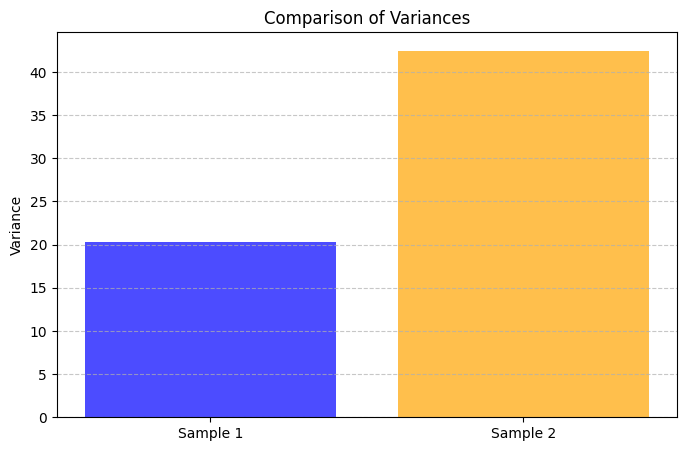

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

def perform_f_test_and_visualize(sample1, sample2, alpha=0.05):
    """
    Perform an F-test to compare the variances of two samples and visualize the results.

    Parameters:
    sample1 (list or numpy array): First dataset
    sample2 (list or numpy array): Second dataset
    alpha (float): Significance level (default is 0.05)

    Returns:
    None
    """
    # Calculate sample variances
    var1 = np.var(sample1, ddof=1)  # Sample variance with Bessel's correction (ddof=1)
    var2 = np.var(sample2, ddof=1)

    # Determine F-statistic (larger variance divided by smaller variance)
    if var1 > var2:
        f_statistic = var1 / var2
        dfn = len(sample1) - 1  # Degrees of freedom for sample 1
        dfd = len(sample2) - 1  # Degrees of freedom for sample 2
    else:
        f_statistic = var2 / var1
        dfn = len(sample2) - 1
        dfd = len(sample1) - 1

    # Calculate p-value for the F-test
    p_value = 1 - f.cdf(f_statistic, dfn, dfd)

    # Critical value for the F-test
    critical_value = f.ppf(1 - alpha, dfn, dfd)

    # Print the results
    print(f"Sample 1 Variance: {var1:.4f}")
    print(f"Sample 2 Variance: {var2:.4f}")
    print(f"F-Statistic: {f_statistic:.4f}")
    print(f"P-Value: {p_value:.4f}")
    print(f"Critical Value: {critical_value:.4f}")

    if f_statistic > critical_value:
        print("Reject the null hypothesis: The variances are significantly different.")
    else:
        print("Fail to reject the null hypothesis: No significant difference in variances.")

    # Visualization
    labels = ['Sample 1', 'Sample 2']
    variances = [var1, var2]

    plt.figure(figsize=(8, 5))
    plt.bar(labels, variances, color=['blue', 'orange'], alpha=0.7)
    plt.title("Comparison of Variances")
    plt.ylabel("Variance")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Example usage
np.random.seed(42)  # For reproducibility
sample1 = np.random.normal(loc=20, scale=5, size=30)  # Mean=20, StdDev=5, Size=30
sample2 = np.random.normal(loc=22, scale=7, size=30)  # Mean=22, StdDev=7, Size=30

perform_f_test_and_visualize(sample1, sample2)

27.  Perform a Chi-square test for goodness of fit with simulated data and analyze the results.

In [30]:
import numpy as np
from scipy.stats import chisquare

# Step 1: Simulate observed data
np.random.seed(42)  # For reproducibility
observed = np.random.randint(10, 50, size=5)  # Simulated observed frequencies

# Step 2: Define expected data
# Ensure the expected frequencies sum to the same value as the observed frequencies
expected = np.array([30, 30, 30, 30, 30])
expected = expected * np.sum(observed) / np.sum(expected) # Scale expected to match observed sum

# Step 3: Perform the Chi-square goodness of fit test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Step 4: Results and analysis
print("Observed Data:", observed)
print("Expected Data:", expected)
print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The observed data significantly differs from the expected distribution.")
else:
    print("Fail to reject the null hypothesis: The observed data does not significantly differ from the expected distribution.")

Observed Data: [48 38 24 17 30]
Expected Data: [31.4 31.4 31.4 31.4 31.4]
Chi-Square Statistic: 18.57
P-Value: 0.0010
Reject the null hypothesis: The observed data significantly differs from the expected distribution.
